In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, metrics
import seaborn as sns

In [48]:
# Number of Data Points.
n_samples = 1500

# The dataset function is available in sklearn package.
noisy_moons, moon_labels = datasets.make_moons(
    n_samples=n_samples, noise=0.1
)  # Generate Moon Toy Dataset.

noisy_circles, circle_labels = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05
)  # Generate Circle Toy Dataset.

# noisy_moons.shape
# moon_labels.shape

In [49]:
# Put in Array.
noisy_moons = np.array(noisy_moons)
noisy_circles = np.array(noisy_circles)

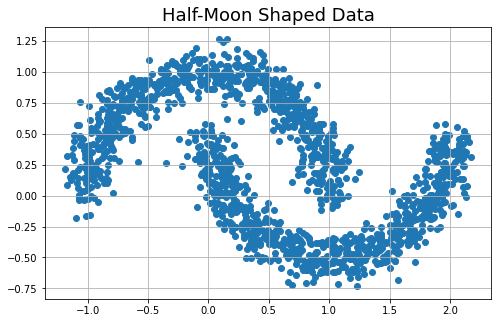

In [50]:
# Plot Half-Moon Data.
plt.figure(figsize=(8, 5))
plt.title("Half-Moon Shaped Data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:, 0], noisy_moons[:, 1])
plt.savefig("HALF_MOON.png", dpi=300)
plt.show()

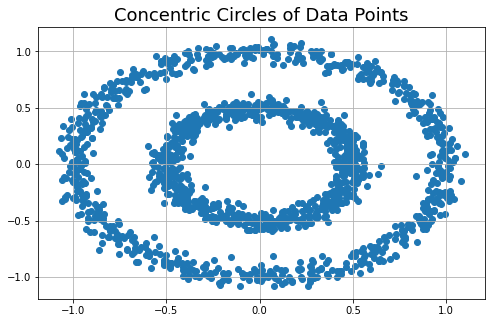

In [51]:
# Plot Circle Data.
plt.figure(figsize=(8, 5))
plt.title("Concentric Circles of Data Points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1])
plt.savefig("CIRCLE.png", dpi=300)
plt.show()

# **K-Means Clustering**

> [**sklearn.cluster.KMeans**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

> [**K-Means Clustering**](https://scikit-learn.org/stable/modules/clustering.html#k-means)

K-Means Clustering aims to partition $N$ observations into $K$ clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This approach results in a partitioning of the data space into Voronoi cells. The problem is computationally difficult (NP-hard); however, efficient Heuristic Algorithms converge quickly to a local optimum K-means algorithm is very fast (one of the fastest clustering algorithms available), but it falls in local minima. That’s why it can be useful to restart it several times.

In [52]:
# Fit K-Means Clustering on noise moon data.
km = cluster.KMeans(n_clusters=2)
km.fit(noisy_moons)
km.labels_

array([1, 0, 0, ..., 0, 0, 1], dtype=int32)

[**sklearn.metrics.silhouette_score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)

In [53]:
print("Completeness: %0.3f" % metrics.completeness_score(moon_labels, km.labels_))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(noisy_moons, km.labels_))

Completeness: 0.212
Silhouette Coefficient: 0.486


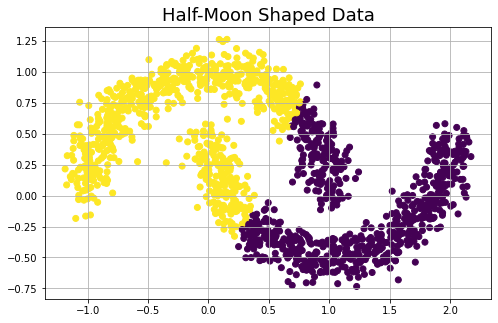

In [54]:
plt.figure(figsize=(8, 5))
plt.title("Half-Moon Shaped Data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:, 0], noisy_moons[:, 1], c=km.labels_)
plt.savefig("CLUSTER_MOON.png", dpi=300)
plt.show()

In [55]:
# Fit K-Means Clustering on noise circle data.
km.fit(noisy_circles)

KMeans(n_clusters=2)

In [56]:
print("Completeness: %0.3f" % metrics.completeness_score(circle_labels, km.labels_))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(noisy_circles, km.labels_))

Completeness: 0.000
Silhouette Coefficient: 0.354


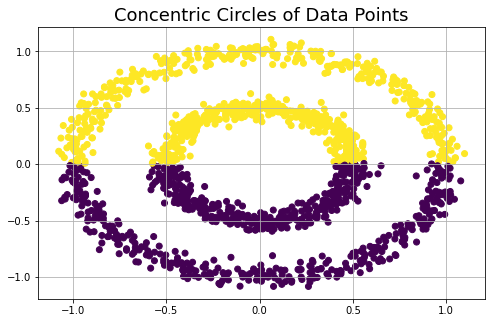

In [57]:
plt.figure(figsize=(8, 5))
plt.title("Concentric Circles of Data Points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1], c=km.labels_)
plt.savefig("CLUSTER_CIRCLE.png", dpi=300)
plt.show()

###  Disadvanatges of K-Means Clustering

##### 1) Difficult to predict $K$-Value.
##### 2) With global cluster, it didn't work well.
##### 3) Different initial partitions can result in different final clusters.

# **DBSCAN**

> [**sklearn.cluster.DBSCAN**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)

> [**DBSCAN**](https://scikit-learn.org/stable/modules/clustering.html#dbscan)

DBSCAN or **Density-Based Spatial Clustering of Applications with Noise** is a data clustering algorithm. It is a density-based clustering algorithm, i.e., given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away).

In [58]:
# Fit DBSCAN Clustering on noise moon data.
dbs = cluster.DBSCAN(
    eps=0.1
)  # The maximum distance between two samples for them to be considered as in the same neighborhood.
dbs.fit(noisy_moons)
dbs.labels_

array([0, 1, 0, ..., 0, 0, 1])

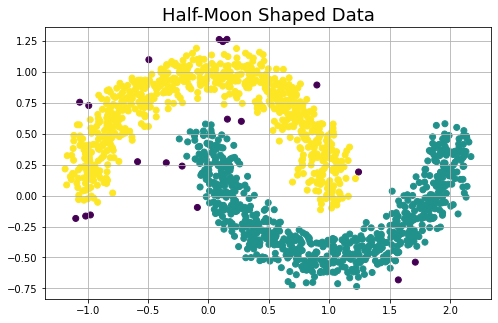

In [59]:
plt.figure(figsize=(8, 5))
plt.title("Half-Moon Shaped Data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:, 0], noisy_moons[:, 1], c=dbs.labels_)
plt.savefig("DBSCAN_MOON.png", dpi=300)
plt.show()

In [60]:
# Fit DBSCAN Clustering on noise circle data.
dbs.fit(noisy_circles)
dbs.labels_

array([0, 1, 0, ..., 1, 1, 0])

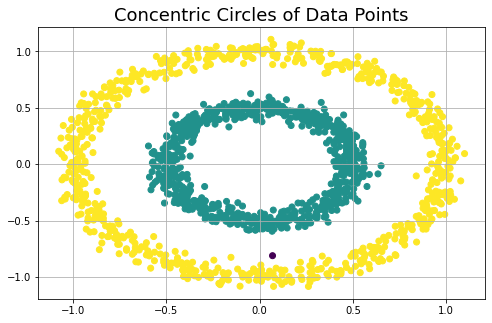

In [61]:
plt.figure(figsize=(8, 5))
plt.title("Concentric Circles of Data Points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1], c=dbs.labels_)
plt.savefig("DBSCAN_CIRCLE.png", dpi=300)
plt.show()

# **PCA on Moon Data.**

In [62]:
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
noisy_moons_spca = scikit_pca.fit_transform(noisy_moons)

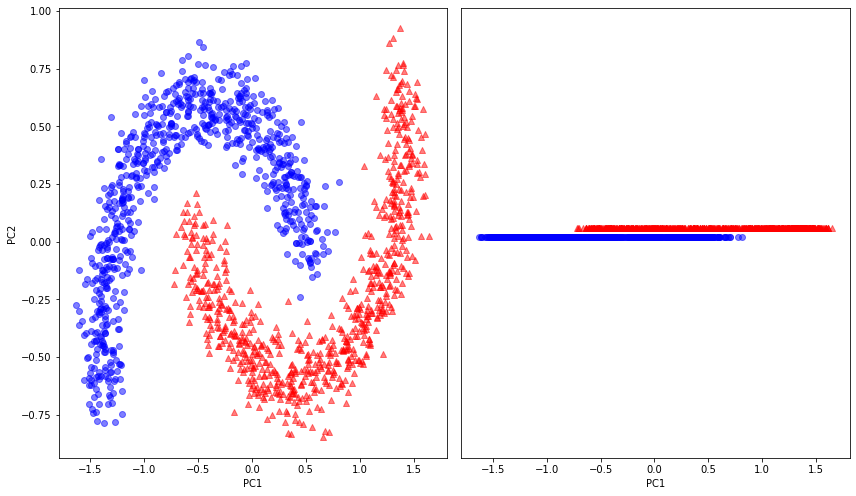

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))

ax[0].scatter(
    noisy_moons_spca[moon_labels == 0, 0],
    noisy_moons_spca[moon_labels == 0, 1],
    color="red",
    marker="^",
    alpha=0.5,
)
ax[0].scatter(
    noisy_moons_spca[moon_labels == 1, 0],
    noisy_moons_spca[moon_labels == 1, 1],
    color="blue",
    marker="o",
    alpha=0.5,
)
ax[1].scatter(
    noisy_moons_spca[moon_labels == 0, 0],
    np.zeros((750, 1)) + 0.02,
    color="red",
    marker="^",
    alpha=0.5,
)
ax[1].scatter(
    noisy_moons_spca[moon_labels == 1, 0],
    np.zeros((750, 1)) - 0.02,
    color="blue",
    marker="o",
    alpha=0.5,
)

ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel("PC1")

plt.tight_layout()
plt.savefig("PCA_MOON.png", dpi=300)
plt.show()

         0        1
0  1.00000 -0.44687
1 -0.44687  1.00000


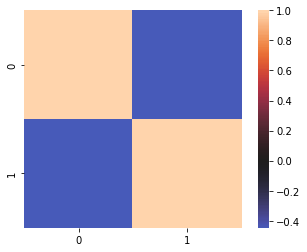

In [64]:
# Compute the correlation matrix before doing PCA.
nm = pd.DataFrame(noisy_moons)
pca_corr = nm.corr()
print(pca_corr)
sns.heatmap(pca_corr, vmax=1, center=0, square=True)
plt.savefig("CORR_PCA.png", dpi=300)

              0             1
0  1.000000e+00 -7.561275e-17
1 -7.561275e-17  1.000000e+00


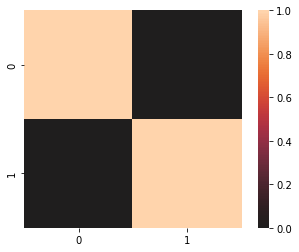

In [65]:
# Compute the correlation matrix after doing PCA.
nmp = pd.DataFrame(noisy_moons_spca)
corr_pca = nmp.corr()
print(corr_pca)
sns.heatmap(corr_pca, vmax=1, center=0, square=True)
plt.savefig("PCA_CORR.png", dpi=300)

## **Kernel PCA**

[**sklearn.decomposition.KernelPCA**](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA)

In [66]:
from sklearn.decomposition import KernelPCA

scikit_kpca = KernelPCA(n_components=2, kernel="rbf", gamma=15)
noisy_moons_kpca = scikit_kpca.fit_transform(noisy_moons)

              0             1
0  1.000000e+00 -3.947125e-16
1 -3.947125e-16  1.000000e+00


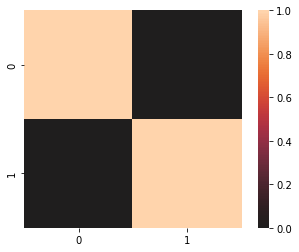

In [67]:
# Compute the correlation matrix after doing PCA.
kmp = pd.DataFrame(noisy_moons_kpca)
corr_kpca = kmp.corr()
print(corr_kpca)
sns.heatmap(corr_kpca, vmax=1, center=0, square=True)
plt.savefig("KPCA_CORR.png", dpi=300)

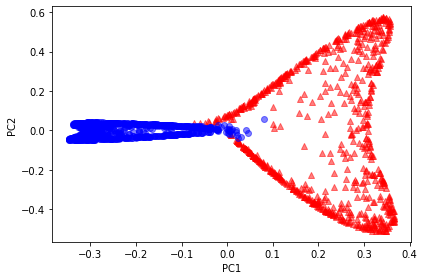

In [68]:
plt.scatter(
    noisy_moons_kpca[moon_labels == 0, 0],
    noisy_moons_kpca[moon_labels == 0, 1],
    color="red",
    marker="^",
    alpha=0.5,
)
plt.scatter(
    noisy_moons_kpca[moon_labels == 1, 0],
    noisy_moons_kpca[moon_labels == 1, 1],
    color="blue",
    marker="o",
    alpha=0.5,
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.savefig("KPCA_MOON.png", dpi=300)

# **Outlier Detection**

In [69]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, contamination=0.01)
clf.fit(noisy_moons)
y_pred_train = clf.predict(noisy_moons)

pos = y_pred_train > 0
neg = y_pred_train < 0

1485
15


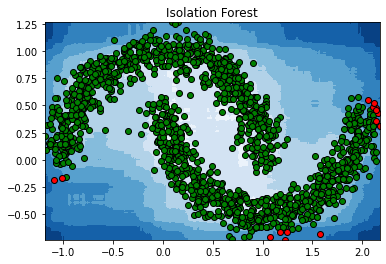

In [70]:
# Plot the line, the samples, and the nearest vectors to the plane.
xx, yy = np.meshgrid(
    np.linspace(min((noisy_moons[:, 0])), max((noisy_moons[:, 0])), 500),
    np.linspace(min((noisy_moons[:, 1])), max((noisy_moons[:, 1])), 500),
)

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Isolation Forest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(noisy_moons[pos][:, 0], noisy_moons[pos][:, 1], c="green", edgecolor="k")
b2 = plt.scatter(noisy_moons[neg][:, 0], noisy_moons[neg][:, 1], c="red", edgecolor="k")

plt.axis("tight")

plt.xlim((xx.min(), xx.max()))
plt.ylim((yy.min(), yy.max()))

plt.savefig("OUTLIER_MOON.png", dpi=300)
print(pos.sum())
print(neg.sum())

In [71]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, contamination=0.01)
clf.fit(noisy_circles)
y_pred_train = clf.predict(noisy_circles)

pos = y_pred_train > 0
neg = y_pred_train < 0

1485
15


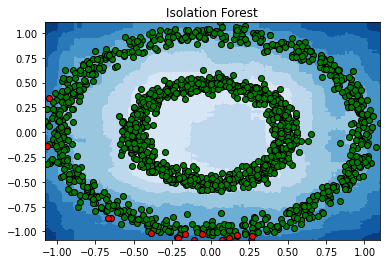

In [72]:
# Plot the line, the samples, and the nearest vectors to the plane.
xx, yy = np.meshgrid(
    np.linspace(min((noisy_circles[:, 0])), max((noisy_circles[:, 0])), 500),
    np.linspace(min((noisy_circles[:, 1])), max((noisy_circles[:, 1])), 500),
)

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Isolation Forest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(noisy_circles[pos][:, 0], noisy_circles[pos][:, 1], c="green", edgecolor="k")
b2 = plt.scatter(noisy_circles[neg][:, 0], noisy_circles[neg][:, 1], c="red", edgecolor="k")

plt.axis("tight")

plt.xlim((xx.min(), xx.max()))
plt.ylim((yy.min(), yy.max()))

plt.savefig("OUTLIER_CIRCLE.png", dpi=300)
print(pos.sum())
print(neg.sum())

# **Clustering and PCA on Wine Dataset.**

In [73]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

df_wine = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",
    header=None,
)

df_wine.columns = [
    "Class Label",
    "Alcohol",
    "Malic Acid",
    "Ash",
    "Alkalinity of Ash",
    "Magnesium",
    "Total Phenols",
    "Flavanoids",
    "Nonflavanoid Phenols",
    "Proanthocyanidins",
    "Color Intensity",
    "Hue",
    "OD280/OD315 of Diluted Wines",
    "Proline",
]

df_wine.head()

,Class Label,Alcohol,Malic Acid,Ash,Alkalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanidins,Color Intensity,Hue,OD280/OD315 of Diluted Wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [74]:
# Split dataset into features and target variables.
X = df_wine.iloc[:, 1:14]
y = df_wine.iloc[:, :1]

print(X.columns)
print(y.columns)

Index(['Alcohol', 'Malic Acid', 'Ash', 'Alkalinity of Ash', 'Magnesium',
       'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols',
       'Proanthocyanidins', 'Color Intensity', 'Hue',
       'OD280/OD315 of Diluted Wines', 'Proline'],
      dtype='object')
Index(['Class Label'], dtype='object')


In [75]:
# Task 1: Check the counts of each wine class.
y.groupby("Class Label").size()

Class Label
1    59
2    71
3    48
dtype: int64

In [76]:
# Task 2: Cluster wine data using K-Means Algorithm.
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=3, random_state=42)
cluster.fit(X)
print(cluster.labels_)

[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]


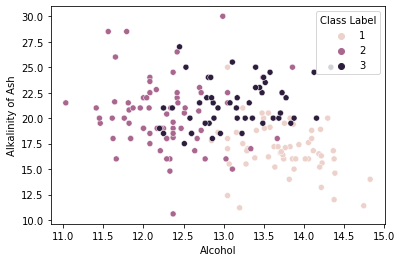

In [77]:
# Task 3: Scatter plot wine data into 3 classes based on True Labels and plot with legends. Hint: use any two variables.
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 3], hue=y["Class Label"], legend="full")

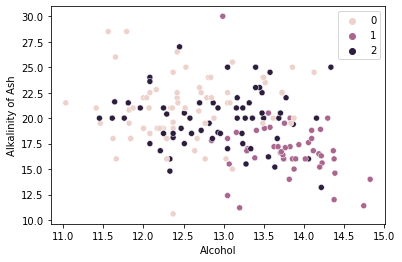

In [78]:
# Task 4: Use cluster model labels to group data based on predicted classes.
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 3], hue=cluster.labels_, legend="full")

In [79]:
# Split the dataset into 70:30 training and test subsets respectively.

from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [80]:
print(pd.value_counts(pd.Series(y)))
print(pd.value_counts(pd.Series(y_train)))
print(pd.value_counts(pd.Series(y_test)))

2    71
1    59
3    48
dtype: int64
2    50
1    41
3    33
dtype: int64
2    21
1    18
3    15
dtype: int64


In [81]:
# Standardizing the data.
# Standardize features by removing the mean and scaling to unit variance.
# The standard score of a sample x is calculated as: z = (x - u) / s

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# **Dimensionality Reduction: Principal Component Analysis using Scikit-learn.**

> [**Principal Component Analysis**](https://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca)

> [**sklearn.decomposition.PCA**](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)

> [**sklearn.decomposition.KernelPCA**](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA)

> [**sklearn.discriminant_analysis.LinearDiscriminantAnalysis**](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

#### **Principal Component Analysis (PCA) - Choosing the Right Number of Dimensions.**

In [82]:
# Choosing the Right Number of Dimensions.
"""
The following code performs PCA without reducing dimensionality, then computes the 
minimum number of dimensions required to preserve 95% of the training set's variance:
"""

pca = PCA().fit(X_train_std)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(explained_variance >= 0.95) + 1
print("The minimum number of dimensions required to preserve 95% of the training set's variance is", d)

# Applying PCA.
pca = PCA(n_components=d)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
print(X_train_pca.shape, X_test_pca.shape)

The minimum number of dimensions required to preserve 95% of the training set's variance is 10
(124, 10) (54, 10)


In [83]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.35730453, 0.19209164, 0.11006755, 0.07250719, 0.06973166,
       0.05341402, 0.04555029, 0.0241568 , 0.02040417, 0.01976974,
       0.01685307, 0.01086639, 0.00728295])

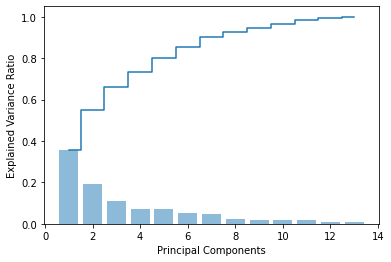

In [84]:
import matplotlib.pyplot as plt

plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align="center")
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where="mid")
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Principal Components")
plt.savefig("PCA_WINE.png", dpi=300)
plt.show()

In [85]:
# Task 5: Apply PCA, KPCA & LDA with `n_components = 2` on X_train_std wine data and transform test data accordingly.

from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

""" Apply PCA. """


def applyPCA(train, test):
    pca = PCA(n_components=2)
    train = pca.fit_transform(train)
    test = pca.transform(test)
    return train, test


""" Apply Kernel PCA. """


def applyKPCA(train, test):
    kpca = KernelPCA(n_components=2, kernel="rbf")
    train = kpca.fit_transform(train)
    test = kpca.transform(test)
    return train, test


""" Apply LDA. """


def applyLDA(train, test):
    lda = LDA(n_components=2)
    train = lda.fit_transform(train, y_train)
    test = lda.transform(test)
    return train, test


# Apply Dimensionality Reduction Technique.
X_train, X_test = applyPCA(X_train_std, X_test_std)
print(X_train.shape, X_test.shape)

(124, 2) (54, 2)


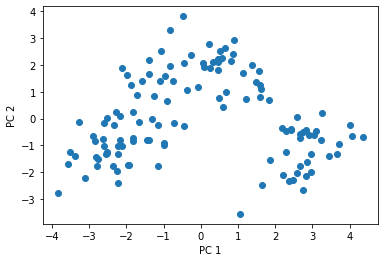

In [86]:
# Plot the first two principal components.
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.savefig("PCA_WINE_ULBL.png", dpi=300)
plt.show()

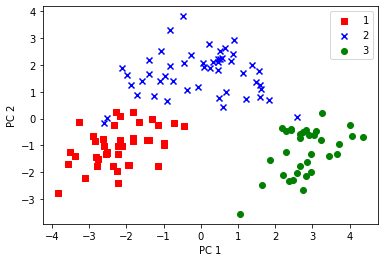

In [87]:
# Plot of two best principal components using y_train data.
colors = ["r", "b", "g"]
markers = ["s", "x", "o"]

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(
        X_train[y_train == l, 0], X_train[y_train == l, 1], c=c, label=l, marker=m
    )
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.legend()
    plt.savefig("PCA_WINE_LBL.png", dpi=300)

In [88]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # Setup marker generator and color map.
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[: len(np.unique(y))])

    # Plot the decision surface.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution)
    )
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples.
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.6,
            c=cmap(idx),
            edgecolor="black",
            label=cl,
        )

# **Train Logistic Regression Classifier using the first 2 Principal Components.**

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Task 6: Apply Logistic Regression on training features and predict test features.
lr = LogisticRegression(random_state=42)
lr = lr.fit(X_train_pca, y_train)
pred_lab = lr.predict(X_test_pca)
print("Accuracy on test is = %f" % (100 * accuracy_score(y_test, pred_lab)))

Accuracy on test is = 94.444444


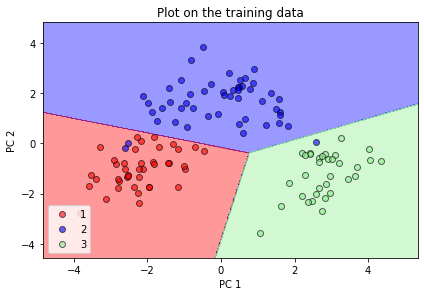

In [90]:
# Plot the decision region on training features and test labels using the classifier we have trained above.
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc="lower left")
plt.tight_layout()
plt.title("Plot on the training data")
plt.savefig("TRAIN_CLASS.png", dpi=300)
plt.show()

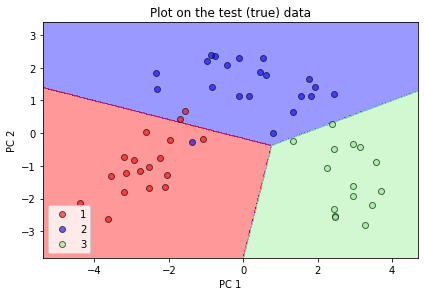

In [91]:
# Plot the decision region on test features and actual labels using the classifier you have trained above.
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc="lower left")
plt.tight_layout()
plt.title("Plot on the test (true) data")
plt.savefig("TEST_CLASS_TRUE.png", dpi=300)
plt.show()

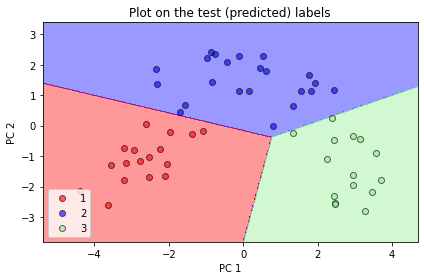

In [92]:
# Plot the decision region on test features and predicted labels using the classifier we have trained above.
plot_decision_regions(X_test_pca, pred_lab, classifier=lr)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc="lower left")
plt.title("Plot on the test (predicted) labels")
plt.tight_layout()
plt.savefig("TEST_CLASS.png", dpi=300)
plt.show()